In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(
    "../data/clean/cleaned_data_main.csv",
    parse_dates=[
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_timestamp",
        "order_estimated_delivery_date"
    ]
)

In [ ]:
# H6 Higher shipping cost is associated with longer delivery time.

In [5]:
df["delivery_time_days"] = (
    df["order_delivered_timestamp"] - df["order_purchase_timestamp"]
).dt.days

In [6]:
df_delivered = df[df["order_status"] == "delivered"].copy()

In [7]:
# For each order_id, look at the amount shipping charge and the average delivery time day.
order_ship_time = (
    df_delivered
    .groupby("order_id")
    .agg(
        shipping_charges=("shipping_charges", "sum"),
        delivery_time_days=("delivery_time_days", "mean"),
    )
    .dropna()
)
# Check the correlation coefficient.
order_ship_time.corr()

,shipping_charges,delivery_time_days
shipping_charges,1.000000,0.019315
delivery_time_days,0.019315,1.000000


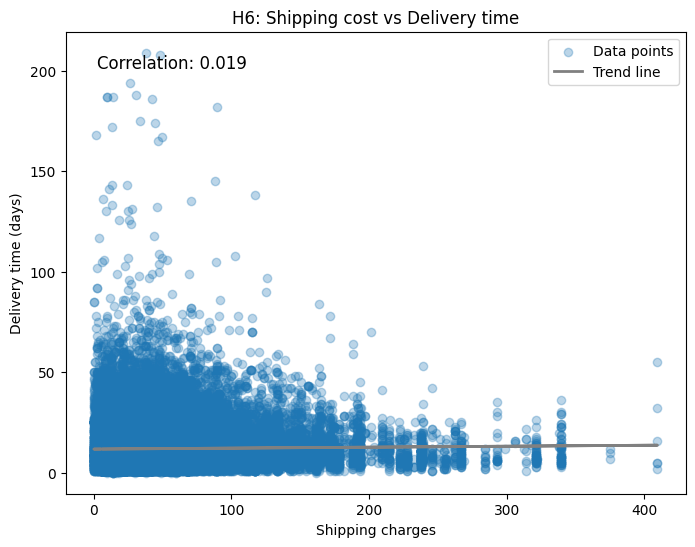

In [8]:
# x = shipping charges
x = order_ship_time["shipping_charges"]
# y = delivery time
y = order_ship_time["delivery_time_days"]

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x, y, alpha=0.3, label="Data points")

# ---- Trend line (regression line) ----
coeffs = np.polyfit(x, y, 1)
trendline = np.poly1d(coeffs)

plt.plot(x, trendline(x), color="gray", linewidth=2, label="Trend line")

# Labels
plt.xlabel("Shipping charges")
plt.ylabel("Delivery time (days)")
plt.title("H6: Shipping cost vs Delivery time")
plt.legend()

corr = x.corr(y)

plt.text(
    0.05, 0.95, 
    f"Correlation: {corr:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)

plt.show()


In [ ]:
#df.to_csv("../data/clean/H6_for_tableau.csv", index=False)

In [ ]:
  plt.savefig(
    "../figures/H6_shipping_charge_vs_deliery_time.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True
)